# 평가 - 성능 평가 지표

## 성능평가지표 (Evaluation Metric)
- 머신러닝 모델의 예측 성능을 평가할 수 있는 방법  
- 분류 알고리즘과 회귀 알고리즘의 성능평가지표 다름  

### 분류 모델의 평가 지표
- 예측 대상이 범주형 데이터 경우
    - 정확도(Accuracy)  
    - **재현율(Recall)**  
    - **정밀도(Precision)**  
    - F1 Score  
    - ROC curve  
    - AUC score

### 회귀 모델의 평가 지표
- 예측 대상이 수치 데이터인 경우  
    - MSE(Mean Square Error)  
    - RMSE(Root Mean Square Error)  
    - MAE(Mean Absolute Error)  
    - MAPE(Mean Absolute Percentage Error)  
    - $ R^2 $

In [ ]:
########################################################################

## 뷴류 모델의 평가 지표 
- 실제 분류와 예측 분류가 얼마나 일치했는가를 기반으로 
  - 알고리즘의 성능을 평가하는 지표  
- 결정값이 단순히 0과 1로 구성된 이진분류에서는 
  - 정확도가 아닌 다른 성능평가지표를 더 중요하게 여기는 경우도 있음 

---
- (1) 정확도(Accuracy)  
- (2) 혼동행렬(Confusion Matrix)(오차행렬)  
- (3) 재현율(Recall)  
- (4) 정밀도(Precision)  
- (5) F1 score   
- (6) ROC curve  
- (7) AUC score 

### (1) 정확도 (Accuracy)
- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- $ 정확도(Accuracy) =  \frac{예측 결과와 실제 값이 동일한 건수}{전체 예측 데이터 건수} $
- 직관적으로 모델 예측 성능을 나타내는 평가 지표 
- 그러나 데이터 구성에 따라 머신러닝 모델의 성능을 왜곡할 가능성이 있음  
  - 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에
     - 정확도 수치 하나만 가지고 성능을 평가하지 않음
- 특히, 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 평가할 경우
    - 적합한 지표가 아님   
    - 정확도의 한계를 보완하기 위해 여러 가지 분류 평가지표와 같이 사용   
    - 불균형한 데이터 세트에서 정확도보다 정밀도(Predision)와 재현율(Recall) 더 선호
- from sklearn.metrics import accuracy_score  
  acc = accuracy_score(y_test, y_pred)

#### 정확도 평가 지표의 맹점
    - 아무것도 하지 않고 무조건 특정한 결과로 찍어도
    - 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음

### 정확도 지표가 ML 모델의 성능을 왜곡하는 예  
#### 타이타닉 생존자 예측
- 타이나틱 예제 수행 결과 정확도가 80%대 정도
    - 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에
    - 별다른 알고리즘 적용 없이
    - 무조건 성별이 여자인 경우 생존, 남자인 경우 사망으로 예측해도
        - 이와 비슷한 수치가 나올 수 있음
- 알고리즘 성능이 좋지 않더라도 단지 성별 조건 하나만을 가지고도  
    - 높은 정확도를 나타내는 상황이 발생한 것  


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 분류 성능 평가지표 예제
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# (1) 데이터 준비
cancer = load_breast_cancer()

# (2) 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                test_size=0.2,
                                                random_state=11)

# (3) 모델 생성 및 햑습/예측/평가 : 로지스틱 회귀 모델 
lr_clf = LogisticRegression(max_iter=3000, random_state=123)
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)

LogisticRegression(max_iter=3000, random_state=123)

In [5]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [6]:
# (1) 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.956140350877193

### (2) 혼동 행렬(Confusion Matrix)(오차행렬)

오차행렬 (Confusion Matrix) (혼동 행렬)
- 분류의 성능을 평가하는 행렬 
- 이진 분류의 예측 오류와 예측 오류 유형을 나타내는 지표  
- 실제값과 예측 값이 같은지 (True), 다른지 (False)
- 예측을 긍정(Positive)으로 했는지, 부정(Negative)로 했는지에 따라
  - 4개의 경우의 수로 4분면 행렬에 보여주는 지표   
  - 예측 클래스와 실제 클래스의 값 유형에 따라 TN, FP, FN, TP 형태  
    - TN : 실제값은 Negative(0)인데, Negative(0)로 예측  
    - FP : 실제값은 Negative(0)인데, Positive(1)로 예측  
    - FN : 실제값은 Positive(1)인데, Negative(0)로 예측  
    - TP : 실제값은 Positive(1)인데, Positive(1)로 예측  

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)    
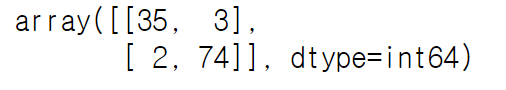 


    - [[TN, FP],  
      [FN, TP]]  

머신러닝에서 혼동행렬(오차행렬)이 중요한 이유
- 머신러닝 모델의 예측이 얼마나 잘 한 예측인지를 판단하는 중요한 기준을 제공  
- 혼동행렬(오차행렬)로부터 머신러닝 모델의 우수성을 평가하는 다른 여러 지표들을 도출  

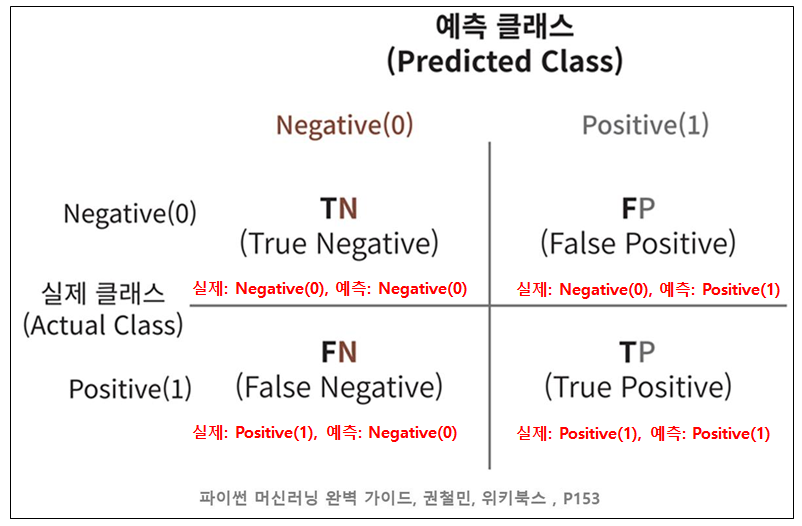

### 혼동행렬(오차행렬) 상에서 정확도

- $ 정확도(Accuracy) =  \frac{예측 결과와 실제 값이 동일한 건수}{전체 예측 데이터 건수} $ 

- 오차 행렬에서의 정확도 
    $ = \frac{TN + TP}{ TN + FP + FN + TP }$
- 위 2개값 동일  

In [7]:
# (2) 혼동행렬(오차행렬)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


# [[TN, FP],  
#   [FN, TP]]

array([[35,  3],
       [ 2, 74]])

In [8]:
import pandas as pd
df = pd.DataFrame({'test':y_test, 'pred': y_pred})
df.head()

,test,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [10]:
# TN : 실제값은 Negative(0)인데, Negative(0)로 예측
len(df[(df.test == 0) & (df.pred == 0)])


35

In [11]:
# FP : 실제값은 Negative(0)인데, Positive(1)로 예측
len(df[(df.test == 0) & (df.pred == 1)])

3

In [12]:
# FN : 실제값은 Positive(1)인데, Negative(0)로 예측
len(df[(df.test == 1) & (df.pred == 0)])

2

In [15]:
# TP : 실제값은 Positive(1)인데, Positive(1)로 예측
# df[(df.test == 1) & (df.pred == 1)].shape
len(df[(df.test == 1) & (df.pred == 1)])

74

## 정밀도(Precision)와 재현율(Recall)

정밀도(Precision)와 재현율(Recall)
- Positive 데이터 예측에 더 초점을 맞춘 평가 지표 
- Positive로 예측한 TP 값이 하나도 없으면  
- 정밀도와 재현율 값이 모두 0 

### 정밀도

정밀도 = TP / (FP + TP)
- Positive로 예측한 것들 중 실제로도 Positive인 것들의 비율 (양성 예측도)
- 예측과 실제 값이 Positive로 일치한 데이터의 비율
- Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가지표

정밀도가 상대적으로 중요성을 가지는 경우 
  - 실제 Negative인 데이터를 Positive로 잘못 예측했을 때 업무상 큰 영향이 발생하는 경우  
  - 예: 스팸메일 여부를 판단하는 모델  
    - 실제 Positive인 스팸메일 Negative인 일반 메일로 분류하더라도  
      - 사용자 불편한 정도로 큰 문제를 발생시키지는 않음  
    - 실제 Negative인 일반 메일을 Positive인 스팸메일로 분류할 경우  
      - 아예 메일을 받지 못하게 되어 큰 문제가 발생할 수도 있음    

from sklearn.metrics import precision_score  
precision = precision_score(y_test, y_pred)

In [17]:
# (3) 정밀도
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.961038961038961

### 재현율

재현율 = TP/ (FN + TP)
- 실제 Positive인 것들 중 Positive로 예측한 것들의 비율
- 민감도(Sentitivity) 또는 TPR(True Positive Rate)이라고도 함


재현율이 상대적으로 중요성을 가지는 경우  
- 실제 Positive인 데이터를 Negative로 잘못 예측했을 때 업무상 큰 영향이 발생할 경우
- 보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많음  

- 예1: 암 판단 모델
    - 실제 Positive인 암 환자를
      - Positive 양성이 아닌 Negative 음성으로
      - 잘못 판단했을 경우 생명과 밀접한 문제가 발생
    - 반면 실제 Negative인 환자를 암 환자인 Positive로 예측하더라도 (심각한 문제 발생할 수도 있지만)
      - 재검사 등 수준의 비용(문제) 문제 발생(심각할 정도는 아닌 문제 발생)

- 예2: 보험 사기와 같은 금융 사기 적발 모델
    - 실제 금융거래 사기인 Positive건을 Negative로 잘못 판단하게 되면
      - 회사에 미치는 손해가 클 것임
    - 반면에 정상 금융거래인 Negative를 금융 사기인 Positive로 잘못 판단해도
      - 재확인 등의 절차로 큰 문제가 되지 않을 수 있음
      
---
from sklearn.metrics import recall_score  
recall = recall_score(y_test, y_pred)  

In [16]:
# (4) 재현율
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9736842105263158

### 재현율과 정밀도의 보완적 관계
- 재현율과 정밀도 모두 TP(실제 Positive, 예측 Positive)를 높이는데 동일하게 초점을 맞추지만
- 재현율은 FN(실제 Positive, 예측 Negative)을 낮추는데 초점을 맞추고
- 정밀도는 FP(실제 Negative, 예측 Positive)를 낮추는데 초점을 맞춤

- 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로
- 분류의 성능을 평가하는데 적용


## 정밀도 / 재현율 트레이드 오프 (Trade-off)

- 업무에 따라 정밀도/재현율 중요도 다름  
- 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데
    - 이를 정밀도/재현율의 트레이드 오프라고 함
- 사이킷런에서는 분류 결정 임계값을 조절해서
- 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안됨
    - 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해
    - 각 예측 상황에 맞는 분류 알고리즘율 튜닝할 수는 있지만
    - 정밀도와 재현율 성능 수치를 어느 한쪽만 참조하면 극단적인 수치 조작 가능
    - **정밀도와 재현율의 수치가 크게 차이가 나지 않도록 조정함**
  
분류 결정 임계값
- Positive 예측값을 결정하는 확률의 기준
- 임계값을 낮출수록 True 값이 많아짐
---

from sklearn.metrics import precision_recall_curve  
precision_recall_curve(실제값, 레이블 값이 1일 때의 예측 확률값)
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11 ~ 0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 구선 형태의 그래프로 시각화하는데 이용

### 사이킷런의 분류 알고리즘에서 예측 확률을 구하는 방식
- 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해
- 먼저 개별 레이블 별로 예측 확률(결정 확률)을 구하고
- 예측 확률(결정 확률)이 큰 레이블 값으로 예측 

- 예: 이진 분류 모델
    - [0일 확률, 1일 확률]
    - [0.1, 0.9] 
    - 특정 데이터가 0이 될 확률 : 10%
    - 1이 될 확률 : 90%로 예측한 경우
    - 최종 예측은 더 큰 확률을 가진 1로 예측
    
- 일반적으로 이진 분류에서는 이 임계값을 0.5(50%)로 정하고
  - 기준값보다 확률이 크면 Positive
  - 작으면 Negative로 결정

    - 예 : [0일 확률, 1일 확률] 
    - [0.7777, 0.2223]   -> 0으로 예측 
    - 이유 : 0.7777이 0.5(50%)보다 크므로 0으로 예측 

In [16]:
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

array([[9.99998655e-01, 1.34470893e-06],
       [1.00000000e+00, 2.05841224e-10],
       [9.99999972e-01, 2.82381380e-08],
       [9.99999944e-01, 5.61671591e-08],
       [1.00000000e+00, 2.30349009e-10],
       [5.57260825e-03, 9.94427392e-01],
       [2.17880319e-01, 7.82119681e-01],
       [5.87665395e-03, 9.94123346e-01],
       [1.30175697e-04, 9.99869824e-01],
       [1.60165978e-03, 9.98398340e-01]])

In [ ]:
# 1(Positive)일 때의 확률

pred_proba[:5]

array([1.34470893e-06, 2.05841224e-10, 2.82381380e-08, 5.61671591e-08,
       2.30349009e-10])

#### 정밀도와 재현율 그래프 확인 
- 정밀도와 재현율이 만나는 임계값 확인 

In [ ]:
from sklearn.metrics import precision_recall_curve
# pred_proba : 1(Positive)일 때의 확률

precision, reacalls, thresholds = 
thresholds.size
precision.size
reacalls.size

114

115

115

In [23]:
# 그래프
# x축은 thresholds 값, y축은 정밀도, 재현율  값으로 plot() 
# x축을 사용할 thresholds 값은 114개
# 정밀도, 재현율 값은 115개
threshold_boundary = thresholds.shape[0]
threshold_boundary

114

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x11dfd3c0140>,
 [Text(-0.05, 0, '−0.05'),
  Text(0.05, 0, '0.05'),
  Text(0.15, 0, '0.15'),
  Text(0.25, 0, '0.25'),
  Text(0.35, 0, '0.35'),
  Text(0.45, 0, '0.45'),
  Text(0.55, 0, '0.55'),
  Text(0.65, 0, '0.65'),
  Text(0.75, 0, '0.75'),
  Text(0.85, 0, '0.85'),
  Text(0.95, 0, '0.95')])

Text(0.5, 0, 'Thresholds Value')

Text(0, 0.5, 'Precision and Recall Value')

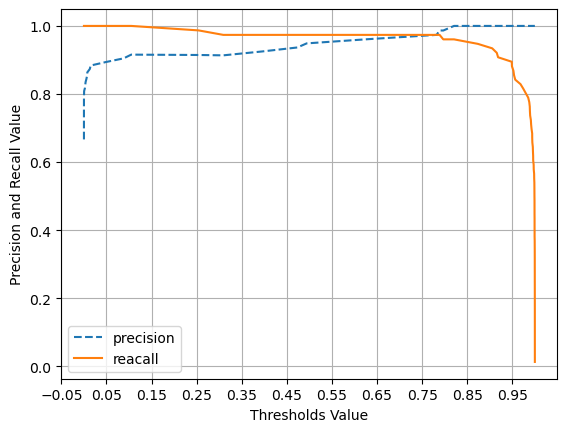

In [26]:
# x축은 thresholds 값, y축은 정밀도, 재현율  값으로 plot() 
plt.plot(thresholds, precision[0:threshold_boundary],
        linestyle='--', label='precision')

plt.plot(thresholds, reacalls[0:threshold_boundary], label='reacall')

# thresholds 값 x축 : 0, 1 단위로 변경
# xlim() : x축  범위 지정
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.xlabel('Thresholds Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid()
plt.show()

# 재현율과 정밀도 곡선이 만나는 곳의 임계값이 약 0.8
# 현재 재현율(0.97xx)과 정밀도(0.961038961038961..)가 
# 어느 한쪽이 크게 크지 않고 조화를 이루면서 두 수치가 높게 나왔기 때문에
# 임계값을 조절할 필요가 없음 

# 정밀도와 재현율의 균형이 맞지 않으면
# 두 선이 만나는 지점의 임계값으로 조절 

# 만일 두 수치가 낮게 나왔다면 (약 40% 대로 가정) 
# 둘 중 어느 값에 맞춰 임계값을 조절해야 할까?
# 현재 데이터에서는 재현율에 맞워서 조절
# 이유 : 암 판단 모델 (재현율이 상대적으로 중요성을 가지는 경우에 해당)
# - 실제 Positive인 암 환자를
# - Positive 양성이 아닌 Negative 음성으로 
# - 잘못 판단했을 경우 생명과 밀접한 문제가 발생
# 재현율이 중요한 경우 재현율 수치를 높이는 방향으로 임계값 조절 


### 정밀도와 재현율 결론  
- 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것
- 반면에 둘 중 어느 한 평가 지표만 매우 높고,
- 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음
- 두 평가지표의 수치가 적절한 조화를 이루어서 종합적으로 성능을 평가해야 함
- 따라서, 정밀도와 재현율의 수치를 적절하게 조합하는 것이 필요함

## F1 Score

F1 Score
- 정밀도와 재현율을 결합한 지표 (정밀도와 재현율의 조화평균)  
- 실제 Positive인 것들 중 Positive로 예측한 것들의 비율  
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높은 값을 나타냄
---
from sklearn.metrics import f1_score  
f1 =  f1_score(y_test, y_pred)

예: 2개의 예측 모델 비교
    
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18
    
B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (큰 차이 없음)
- F1 스코어 : 0.5
 
B 모델의 F1 스코어가 A 모델에 비해 매우 우수

In [ ]:
# (5) F1 스코어
from sklearn.metrics import f1_score


0.9673202614379085

### ROC Curve와 AUC Score

### ROC( Reciver Operating Characteristic) 
- FPR(False Positive Rate)(x축)이 변할 때 TPR(True Positie Rate)(y축)이 변하는 것을 나타내는 곡선
- Positiv로 잘못 판단한 것에 대한 진짜 Positiv의 비율을 나타내는 곡선
- 분류 결정 임계값을 조절하면서 FPR이 0부터 1까지 변할 때 TPR의 변화값을 그래프에 나타냄
- 우상향 그래프 형태   
- ROC 곡선 자체는 FPR과 TPR의 변화값을 확인하는데 이용  
- ROC 곡선 아래의 면적 값을 분류 성능지표로 사용  

TPR(True Positie Rate) : 재현율(민감도)  
- 실제 Positive를 Positive로 예측한 비율  
- 질병이 있는 사람을 질병이 있는 것으로 양성 판정  
- 값이 클수록(1에 가까울수록) 좋음 (양성을 잘 예측)  

FPR(False Positive Rate)
- 실제는 Negative인데 Positive로 잘못 예측한 비율  
- 질병이 없는 건강한 사람이 질병이 있는 것으로 예측되는 수준  
- 정답이 0인데 1로 예측한 비율  
- 1-특이성(Specificity)    


TNR(True Negative Rate) : 특이성 (Specificity)
- 실제 음성인데 음성으로 예측한 비율
- 질병이 없는 사람을 질병이 없는 것으로 음성 판정
- 값이 클수록 좋음 (음성을 잘 예측)

---
from sklearn.metrics import roc_curve  
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

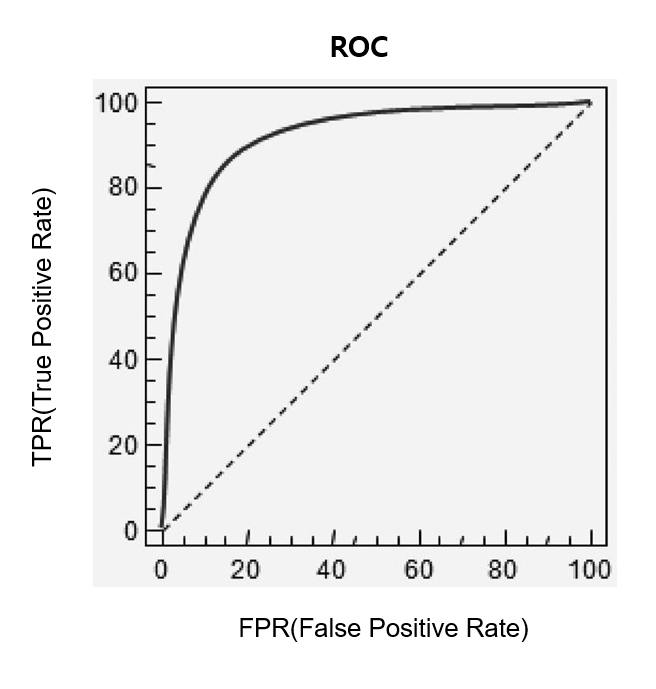  

TPR은 1에 가까울수록 좋고 (Positive를 Positive로 잘 예측),   
FPR은 0에 가까울수록 좋기 때문에 (Negative를 Positive로 잘못 예측)   
좌상단에 붙어있는 커브가 더 좋음

In [ ]:
# (6) ROC 커브
from sklearn.metrics import roc_curve

# 1(Positive)일 때의 확률
pred_proba = lr_clf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = 
fpr
tpr
thresholds

array([0.        , 0.        , 0.        , 0.02631579, 0.02631579,
       0.18421053, 0.18421053, 1.        ])

array([0.        , 0.01315789, 0.96052632, 0.96052632, 0.97368421,
       0.97368421, 1.        , 1.        ])

array([           inf, 9.99997522e-01, 8.20735419e-01, 7.96880192e-01,
       7.88767461e-01, 3.08971522e-01, 1.04815863e-01, 1.00222985e-39])

### AUC(Area Under the Curve)  스코어
- ROC 곡선을 기반으로 하는 이진 분류모델의 성능평가지표
- ROC 곡선 아래 면적 값을 분류 성능지표로 사용
- 대각선의 직선에 대응되면 AUC는 0.5  
- TPR은 1에 가까울수록 좋고, FPR은 0에 가까울수록 좋기 때문에 좌상단에 붙어있는 커브가 더 좋음
- 즉, 커브 아래 면적이 넓을수록 좋은 성능을 가진 이진 분류기라고 볼 수 있음
---
from sklearn.metrics import roc_curve, auc  
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)  
auc = auc(fpr, tpr)  

In [ ]:
# (7) AUC score
from sklearn.metrics import roc_curve, auc

# 1(Positive)일 때의 확률
pred_proba = lr_clf.predict_proba(X_test)[:, 1]



0.9948060941828255

In [ ]:
from sklearn.metrics import  roc_auc_score


0.9948060941828255

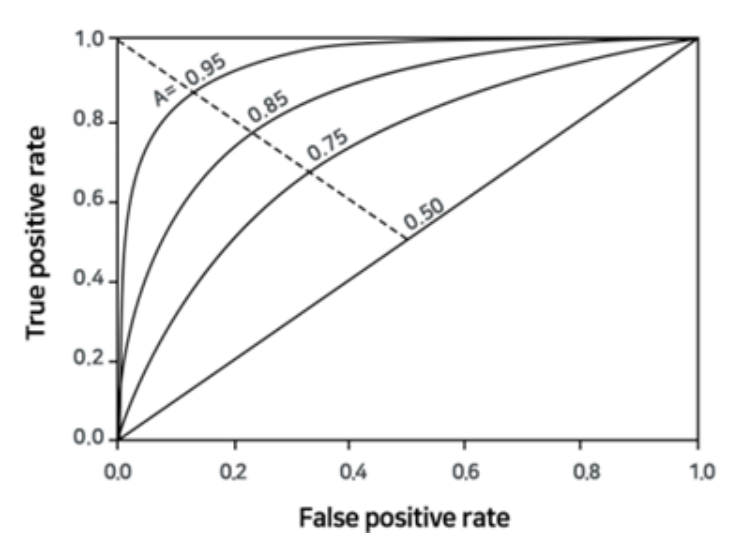